<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/EEG_analysis_topoplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.7 MB/s eta 0:00:00


Extracting EDF parameters from /content/tarumi20220202_20220202_015012_ref_fil.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 931499  =      0.000 ...  3725.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Selecting by number: 19 components
Fitting ICA took 71.8s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Not setting metadata
3726 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3726 events and 251 original time points ...
1 bad epochs dropped


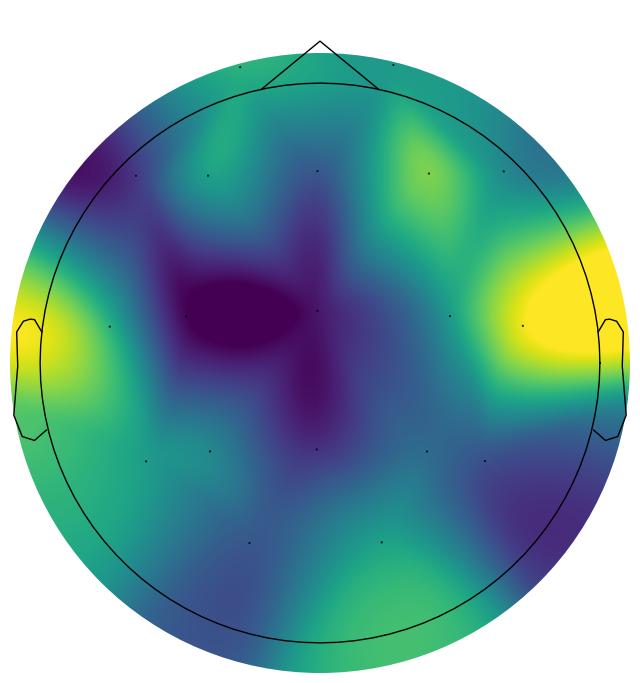

In [15]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import mne
import numpy as np
import matplotlib.pyplot as plt

# EDFファイルの読み込み
edf_file = '/content/tarumi20220202_20220202_015012_ref_fil.edf'
raw = mne.io.read_raw_edf(edf_file, preload=True)

# データのフィルタリング
# 例: バンドパスフィルタを適用 (1-50 Hz)
raw.filter(1, 50, fir_design='firwin')

# ノイズリダクション
# 例: ICA (独立成分解析) を使用してアーティファクトを検出・除去
ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)
ica.fit(raw)
raw = ica.apply(raw)

# エポックデータに分割
event_id = 1  # イベントIDを設定
events = mne.make_fixed_length_events(raw, event_id, duration=1.0)
epochs = mne.Epochs(raw, events, event_id, tmin=0, tmax=1.0, baseline=None, preload=True)


# 特定のエポックを選択
epoch_number = 0  # エポックの番号を選択
eeg_data = epochs.get_data()[epoch_number]


# EEGチャンネル名のリスト（10-20法に基づく順序で）
channel_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']

# チャンネルの位置情報を設定
montage = mne.channels.make_standard_montage('standard_1005')
info = mne.create_info(channel_names, sfreq=raw.info['sfreq'], ch_types='eeg')
info.set_montage(montage)


fig, ax = plt.subplots(figsize=(8, 8))  # 新しい図を作成し、サイズを指定
mne.viz.plot_topomap(eeg_data_corrected[0], info, axes=ax, show=False, cmap='viridis', contours=0)  # プロットを指定した図に追加
plt.savefig('topomap.png', dpi=300)  # 画像を保存
